## 상관분석 (검정)

- 목적 : 두 연속형 변수간에 어떤 선형관계를 갖는지 파악

- 귀무가설 : 두 변수는 독립적 (상관성이 없음)
- 대립가설 : 두 변수는 독립적이지 않음 (상관성이 있음)

- 산점도로 시각화

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import* 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [6]:
df = pd. read_excel('../data/일별_금은달러.xlsx')

In [7]:
df.shape
df.head()
df.tail()

(28, 4)

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


,일자,금값,은값,달러 환율
23,2020.07.07,68443.14,18.63,1197.0
24,2020.07.06,68269.27,18.50,1194.0
25,2020.07.02,68278.07,18.24,1199.0
26,2020.07.01,68941.28,18.13,1203.5
27,2020.06.30,68559.78,18.54,1203.0


In [8]:
# 일자별로 정렬

df.sort_values(by='일자', inplace=True)
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [12]:
# index 정렬
#df.reset_index()

,index,일자,금값,은값,달러 환율
0,27,2020.06.30,68559.78,18.54,1203.0
1,26,2020.07.01,68941.28,18.13,1203.5
2,25,2020.07.02,68278.07,18.24,1199.0
3,24,2020.07.06,68269.27,18.50,1194.0
4,23,2020.07.07,68443.14,18.63,1197.0
5,22,2020.07.08,69184.17,19.08,1195.0
6,21,2020.07.09,69748.21,18.88,1195.0
7,20,2020.07.10,69735.18,18.98,1201.0
8,19,2020.07.13,69933.64,19.71,1203.0
9,18,2020.07.14,69827.02,19.45,1206.5


In [9]:
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


([<matplotlib.axis.XTick at 0x1fb4e3de070>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

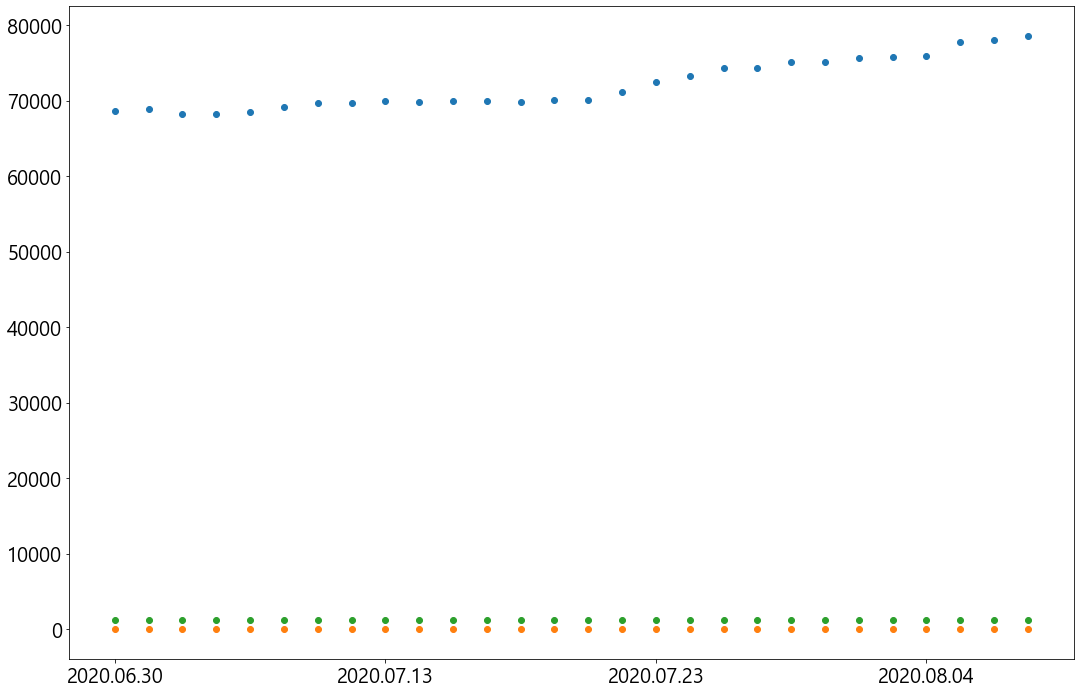

In [10]:
## 산점도 시각화

# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (18, 12)


plt.scatter(df['일자'], df['금값'])
plt.scatter(df['일자'], df['은값'])
plt.scatter(df['일자'], df['달러 환율'])
plt.xticks(df['일자'].iloc[::8])


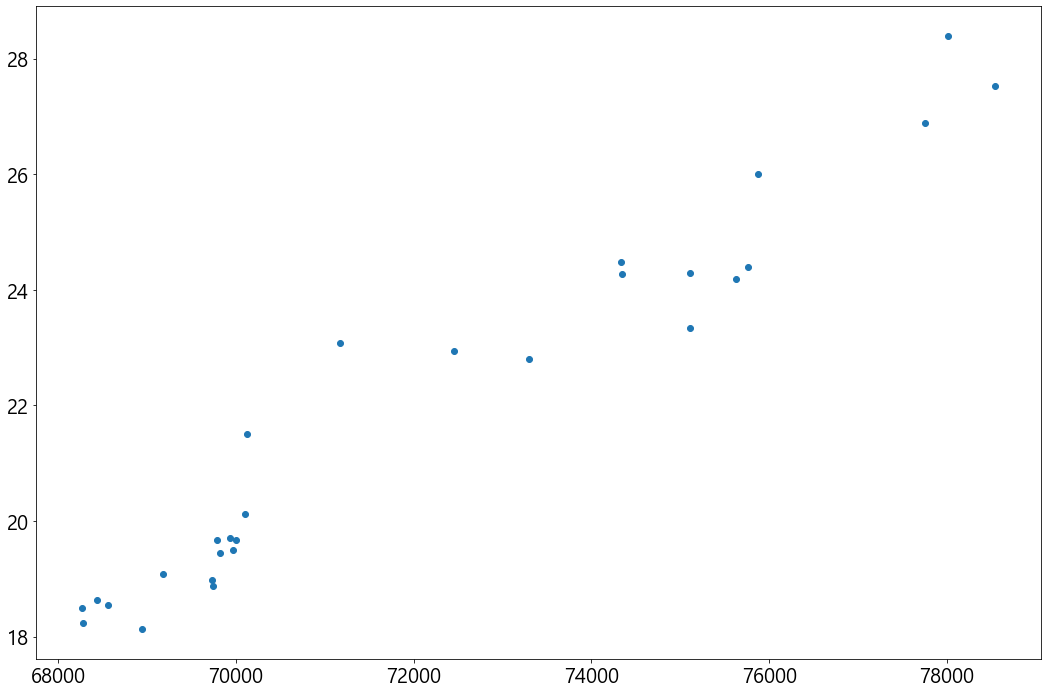

In [11]:
plt.scatter(df['금값'], df['은값'])

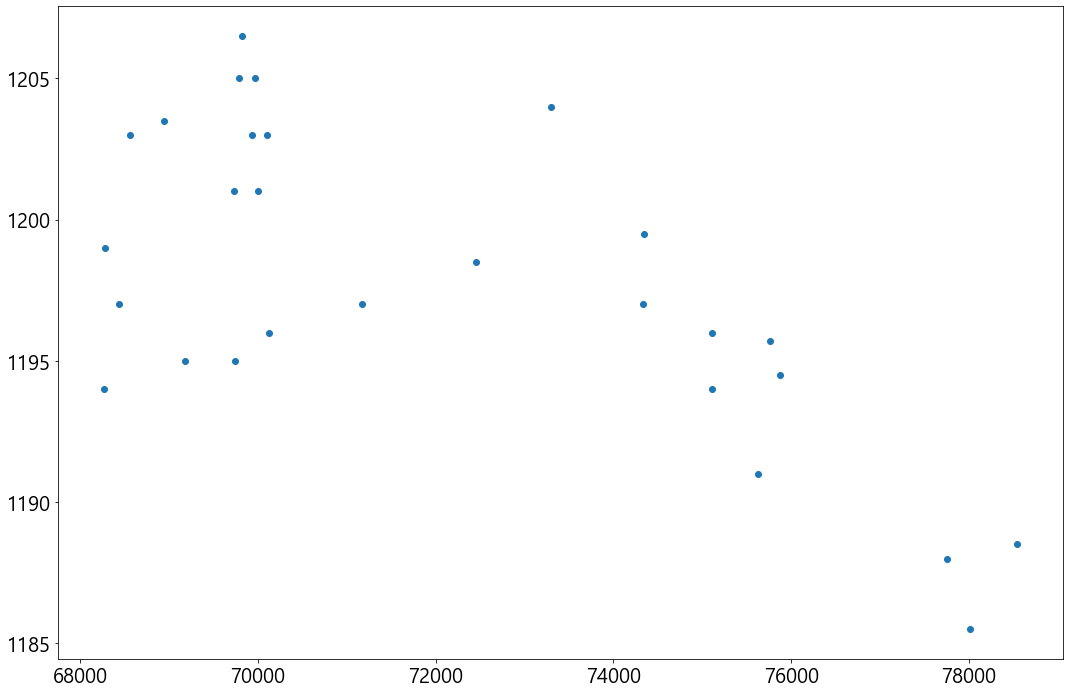

In [12]:
plt.scatter(df['금값'], df['달러 환율'])

array([[<AxesSubplot:xlabel='금값', ylabel='금값'>,
        <AxesSubplot:xlabel='은값', ylabel='금값'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='금값'>],
       [<AxesSubplot:xlabel='금값', ylabel='은값'>,
        <AxesSubplot:xlabel='은값', ylabel='은값'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='은값'>],
       [<AxesSubplot:xlabel='금값', ylabel='달러 환율'>,
        <AxesSubplot:xlabel='은값', ylabel='달러 환율'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='달러 환율'>]], dtype=object)

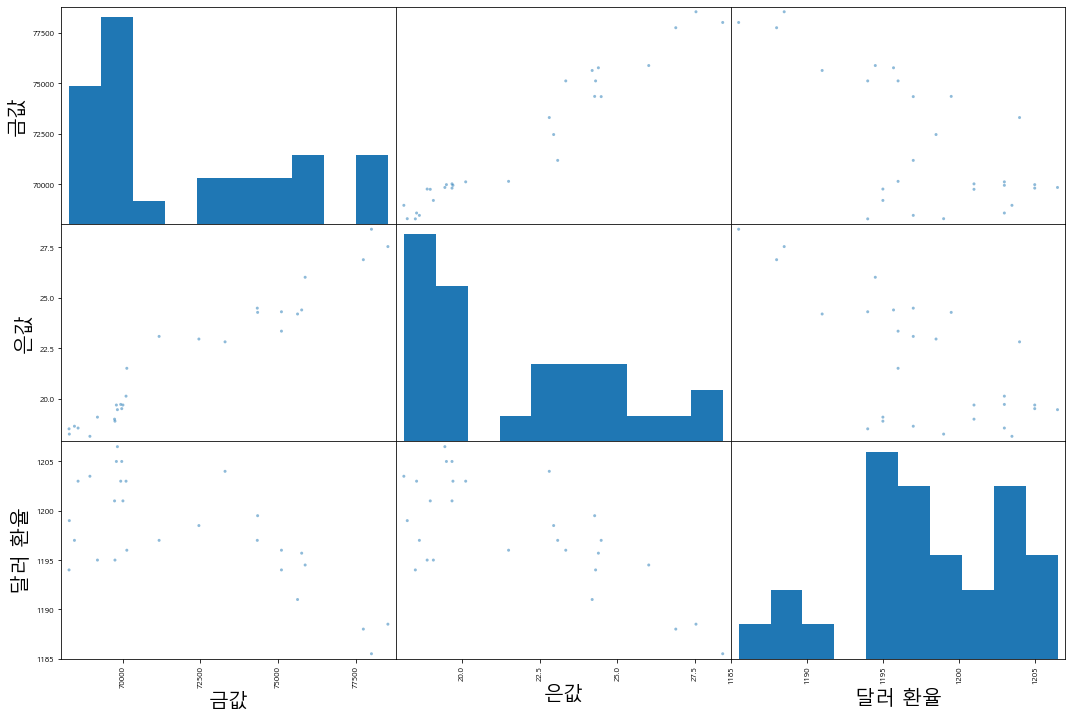

In [13]:
pd.plotting.scatter_matrix(df.drop('일자', axis=1))

## 상관분석(피어슨 상관계수 , 스피어만 상관계수) - pvalue 반환

- 두 변수 모두 연속형 변수 일때 사용하는 상관계수로 x와 y에 대한 상관 계수는 다음과 같이 정의 됨

- 상관계수가 1에 가까울 수록 양의 상관관계가 강하다고 함
- 상관계수가 -1에 가까울수록 음의 상관관계가 강하다고 함
- 상관계수가 0에 가까울수록 상관관계가 약하다고 함

![](../picture/상관계수.PNG)

In [15]:
pearsonr(df['금값'],df['은값'])

# 상관계수 : 0.97
# pvalue 0에 수렴 - 귀무가설 기각

(0.9718640116033496, 7.508878356557318e-18)

In [16]:
pearsonr(df['금값'],df['달러 환율'])
# 상관계수 : -0.67 음의상관 금값이 올라가면 달러환율이 떨어짐

(-0.6793266264341937, 7.033325258452259e-05)

In [17]:
pearsonr(df['은값'],df['달러 환율'])
# 상관계수 : -0.695 음의상관 은값이 올라가면 달러환율이 떨어짐

(-0.6954569556203559, 3.989042061957972e-05)

## 스피어만 상관 계수


- 분석하고자 하는 두 연속형 분포가 심각하게 정규분포를 벗어난다거나 순위척도 자료일 때 사용
    - 연속형 자료일 때는 각 측정값을 순위 척도 자료로 변환시켜 계산
    
    
    
- 두 변수 순위 사이의 단조 관련성(한 변수가 증가할 때 다른 변수가 증가하는지 감소하는지에 대한 관계)만을 측정하는 상관계수
- 선형적인 상관 관계를 나타내지 않는다


![](../picture/상관분석함수.png)

![](../picture/스피어만통계량.png)

In [18]:
df

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0
22,2020.07.08,69184.17,19.08,1195.0
21,2020.07.09,69748.21,18.88,1195.0
20,2020.07.10,69735.18,18.98,1201.0
19,2020.07.13,69933.64,19.71,1203.0
18,2020.07.14,69827.02,19.45,1206.5


In [19]:
import itertools #스피어만 상관계수
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))


금값 ~ 은값: coef:0.9711235892228813, p-value: 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value: 0.006257468267109453
은값 ~ 달러 환율: coef:-0.528106006718531, p-value: 0.003869997604824081


In [20]:
for col1, col2 in itertools.combinations(target_columns, 2):
    print(col1, col2)

금값 은값
금값 달러 환율
은값 달러 환율


In [21]:
for col1, col2 in itertools.combinations(target_columns, 2):
    print(df[col1], df[col2])

27    68559.78
26    68941.28
25    68278.07
24    68269.27
23    68443.14
22    69184.17
21    69748.21
20    69735.18
19    69933.64
18    69827.02
17    70004.80
16    69966.63
15    69793.91
14    70104.72
13    70129.97
12    71170.07
11    72451.43
10    73293.98
9     74332.14
8     74342.85
7     75110.45
6     75110.59
5     75628.90
4     75761.76
3     75873.57
2     77748.00
1     78009.22
0     78538.90
Name: 금값, dtype: float64 27    18.54
26    18.13
25    18.24
24    18.50
23    18.63
22    19.08
21    18.88
20    18.98
19    19.71
18    19.45
17    19.68
16    19.50
15    19.68
14    20.12
13    21.50
12    23.08
11    22.95
10    22.81
9     24.48
8     24.27
7     24.30
6     23.34
5     24.19
4     24.39
3     26.01
2     26.88
1     28.39
0     27.53
Name: 은값, dtype: float64
27    68559.78
26    68941.28
25    68278.07
24    68269.27
23    68443.14
22    69184.17
21    69748.21
20    69735.18
19    69933.64
18    69827.02
17    70004.80
16    69966.63
15    69793.91

In [22]:
for col1, col2 in itertools.combinations(target_columns, 2):
    print(col1, col2)

금값 은값
금값 달러 환율
은값 달러 환율


## 상관행렬

In [23]:
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [24]:
df.drop('일자', axis=1)

,금값,은값,달러 환율
27,68559.78,18.54,1203.0
26,68941.28,18.13,1203.5
25,68278.07,18.24,1199.0
24,68269.27,18.50,1194.0
23,68443.14,18.63,1197.0
22,69184.17,19.08,1195.0
21,69748.21,18.88,1195.0
20,69735.18,18.98,1201.0
19,69933.64,19.71,1203.0
18,69827.02,19.45,1206.5


In [25]:
df.corr(method='pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [26]:
df.drop('일자',axis=1).corr(method='pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [27]:
df.drop('일자',axis=1).corr(method='spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000
